<a href="https://colab.research.google.com/github/diosamuel/markov-chain-parking-lot/blob/main/markov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_excel('/content/Dataset Pemstok(1).xlsx')

In [ ]:
df = df[1:]

In [ ]:
df.columns = ["hari","tanggal","pagi","siang","sore"]

In [ ]:
df

,hari,tanggal,pagi,siang,sore
1,Senin,2025-11-17,55,37,20
2,Selasa,2025-11-18,17,31,28
3,Rabu,2025-11-19,43,47,53
4,Kamis,2025-11-20,38,35,20
5,Jumat,2025-11-21,0,0,0


# add state

In [ ]:
"""
Tidak Penuh,0<x<20
Sedang,20<x<40
Penuh,40<x<60
"""

'\nTidak Penuh,0<x<20\nSedang,20<x<40\nPenuh,40<x<60\n'

In [ ]:
pagi = pd.cut(
    df["pagi"],
    bins=[-1, 20, 40, 60],
    labels=['Tidak Penuh', 'Sedang', 'Penuh']
)
siang = pd.cut(
    df["siang"],
    bins=[-1, 20, 40, 60],
    labels=['Tidak Penuh', 'Sedang', 'Penuh']
)
sore = pd.cut(
    df["sore"],
    bins=[-1, 20, 40, 60],
    labels=['Tidak Penuh', 'Sedang', 'Penuh']
)



In [ ]:
df = pd.concat([pagi, siang, sore], axis=1)
df

,pagi,siang,sore
1,Penuh,Sedang,Tidak Penuh
2,Tidak Penuh,Sedang,Sedang
3,Penuh,Penuh,Penuh
4,Sedang,Sedang,Tidak Penuh
5,Tidak Penuh,Tidak Penuh,Tidak Penuh


In [ ]:
import pandas as pd
import numpy as np

states = ["Tidak Penuh", "Sedang", "Penuh"]
state_to_idx = {state: idx for idx, state in enumerate(states)}
transitions = []
for _, row in df.iterrows():
    transitions.append((row['pagi'], row['siang']))
    transitions.append((row['siang'], row['sore']))
n_states = len(states)
transition_matrix = np.zeros((n_states, n_states))
for current, nxt in transitions:
    i = state_to_idx[current]
    j = state_to_idx[nxt]
    transition_matrix[i][j] += 1
transition_prob = transition_matrix / transition_matrix.sum(axis=1, keepdims=True)
transition_df = pd.DataFrame(
    transition_prob,
    columns=[f"to_{s}" for s in states],
    index=[f"from_{s}" for s in states]
)


In [ ]:
transition_df

,to_Tidak Penuh,to_Sedang,to_Penuh
from_Tidak Penuh,0.666667,0.333333,0.000000
from_Sedang,0.500000,0.500000,0.000000
from_Penuh,0.000000,0.333333,0.666667


Kondisi
State 3
State 4
State 5
State 3
0.0
1.0
0.0
State 4
0.0
0.125
0.75
State 5
0.125
0.5
0.125

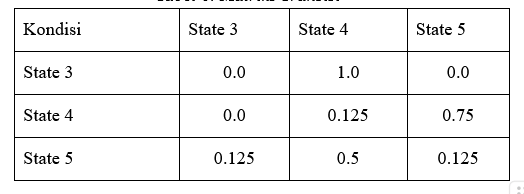

In [10]:
import pandas as pd

# Create a DataFrame to represent the transition matrix
data = {
    'State 3': [0, 1, 0],
    'State 4': [0, 0.125, 0.75],
    'State 5': [0.125, 0.5, 0.125],
}

# Define index labels
index = ['State 3', 'State 4', 'State 5']

# Create DataFrame
transition_df = pd.DataFrame(data, index=index)

# Display the matrix
transition_df


,State 3,State 4,State 5
State 3,0,0.000,0.125
State 4,1,0.125,0.500
State 5,0,0.750,0.125


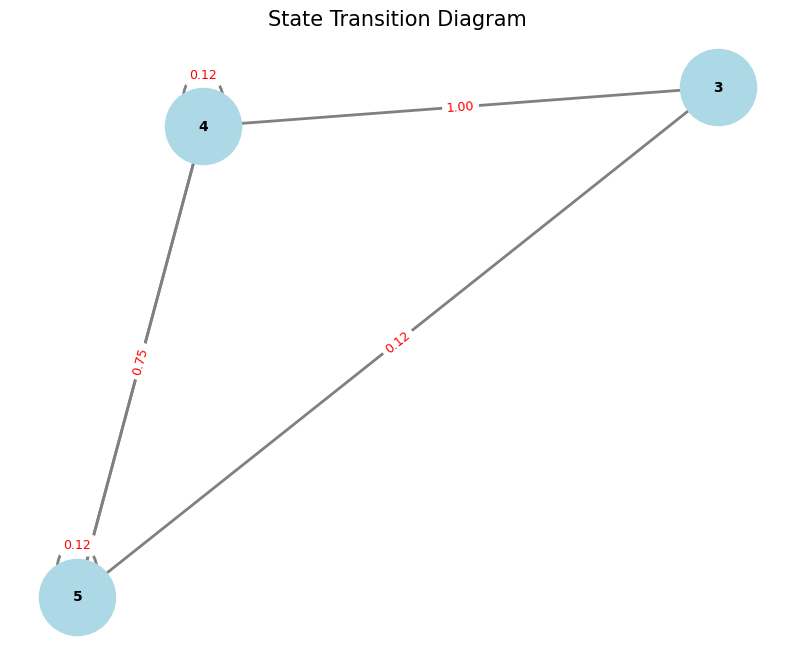

In [12]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

# Add nodes (states)
states = [s.replace('State ', '') for s in transition_df.index]
for state in states:
    G.add_node(state)

# Add edges with probabilities
for from_state_full in transition_df.index:
    from_state = from_state_full.replace('State ', '')
    for to_state_full in transition_df.columns:
        to_state = to_state_full.replace('State ', '')
        probability = transition_df.loc[from_state_full, to_state_full]
        if probability > 0:  # Only add edges with non-zero probability
            G.add_edge(from_state, to_state, weight=f'{probability:.2f}')


# Draw the graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, k=0.7, iterations=50)  # positions for all nodes

# Nodes
nx.draw_networkx_nodes(G, pos, node_size=3000, node_color='lightblue')

# Edges
# Draw edges with different styles for clarity if needed, or simply standard arrows
nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=20, edge_color='gray', width=2)

# Labels
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=9)

plt.title('State Transition Diagram', size=15)
plt.axis('off') # Hide axes
plt.show()